# Decision Tree

In [2]:
# import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
              'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
              'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
              'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)



Accuracy: 0.8248407643312102

Classification Report:
               precision    recall  f1-score   support

        fair       0.79      0.92      0.85       171
        good       0.93      0.80      0.86        64
        poor       0.84      0.65      0.73        79

    accuracy                           0.82       314
   macro avg       0.85      0.79      0.81       314
weighted avg       0.83      0.82      0.82       314



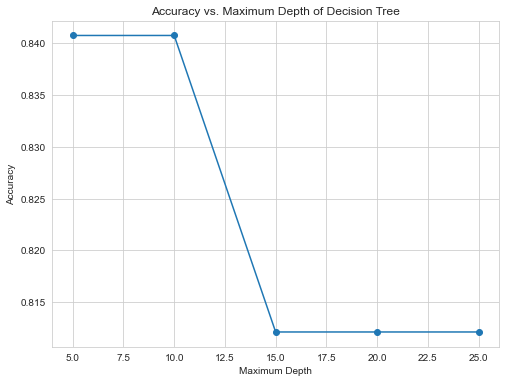

In [3]:
# Initialize lists to store accuracy values
max_depth_values = [5, 10, 15, 20, 25]  # Different maximum depths to try
accuracies = []

for max_depth in max_depth_values:
    # Define the Decision Tree Classifier with the current maximum depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Maximum Depth of Decision Tree')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# SVM

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set_style('whitegrid')

# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
              'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures', 'school_support',
              'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic', 'family_quality',
              'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'period1_score', 'period2_score', 'final_score']

# Convert final_score to categorical variable: Good:15~20, Fair:10~14, Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:  # Use 'object' instead of 'np.object'
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Support Vector Machine (SVM) Classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)  # You can choose different kernels and hyperparameters as needed
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.856687898089172

Classification Report:
               precision    recall  f1-score   support

        fair       0.82      0.94      0.88       171
        good       0.96      0.84      0.90        64
        poor       0.86      0.70      0.77        79

    accuracy                           0.86       314
   macro avg       0.88      0.83      0.85       314
weighted avg       0.86      0.86      0.85       314



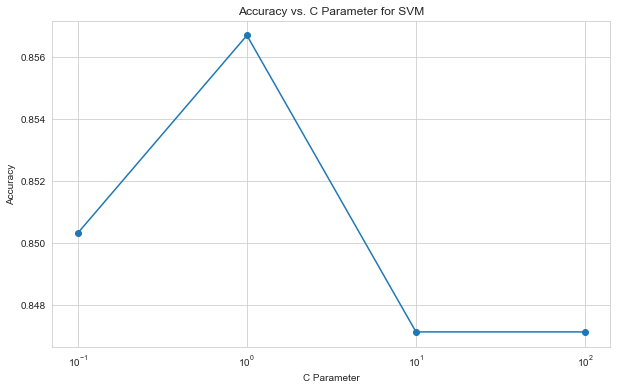

In [24]:
# Varying values of the C parameter
C_values = [0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    # Initialize and train the Support Vector Machine (SVM) Classifier with different C values
    clf = SVC(kernel='linear', C=C, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store it in the accuracies list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. C Parameter for SVM')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

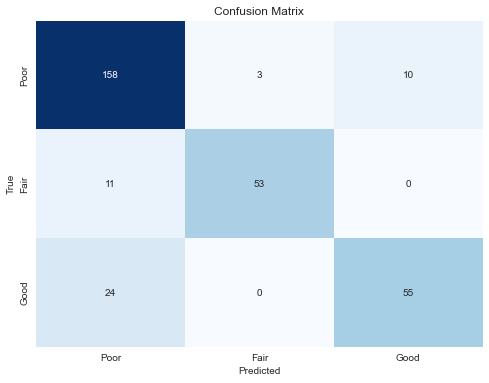

In [25]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Poor', 'Fair', 'Good'], yticklabels=['Poor', 'Fair', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


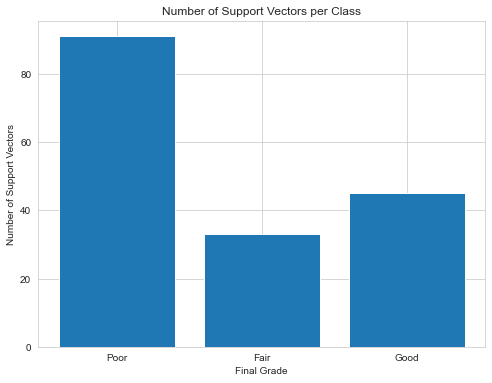

In [28]:
# Get the number of support vectors for each class
n_support_vectors = clf.n_support_

plt.figure(figsize=(8, 6))
plt.bar(['Poor', 'Fair', 'Good'], n_support_vectors)
plt.xlabel('Final Grade')
plt.ylabel('Number of Support Vectors')
plt.title('Number of Support Vectors per Class')
plt.show()


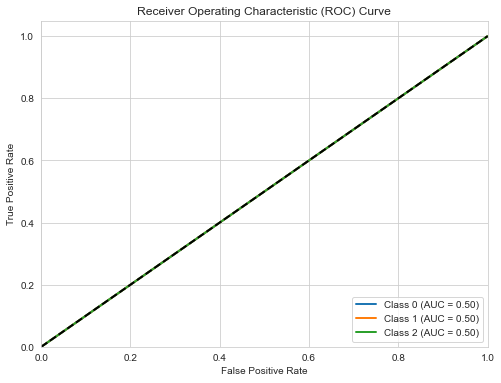

In [33]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
n_classes = len(np.unique(y))
y_bin = LabelEncoder().fit_transform(y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_bin == i).astype(int), (y_pred == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# naive bayes

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set_style('whitegrid')

# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
              'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures', 'school_support',
              'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic', 'family_quality',
              'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'period1_score', 'period2_score', 'final_score']

# Convert final_score to categorical variable: Good:15~20, Fair:10~14, Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes Classifier (Gaussian Naive Bayes for continuous features)
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.6687898089171974

Classification Report:
               precision    recall  f1-score   support

        fair       0.78      0.55      0.64       171
        good       0.51      0.97      0.67        64
        poor       0.76      0.68      0.72        79

    accuracy                           0.67       314
   macro avg       0.68      0.73      0.68       314
weighted avg       0.72      0.67      0.67       314



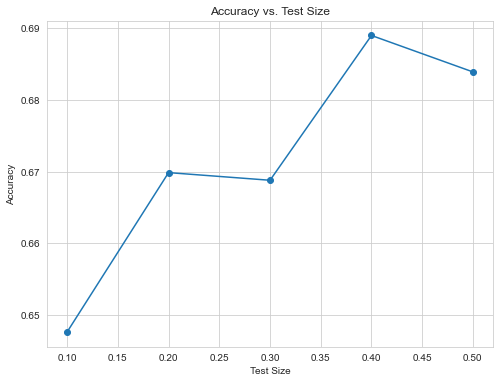

In [20]:
# Initialize lists to store accuracy values
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]  # Different test sizes to try
accuracies = []

for test_size in test_sizes:
    # Split the data into training and testing sets with the current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize and train the Naive Bayes Classifier (Gaussian Naive Bayes for continuous features)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


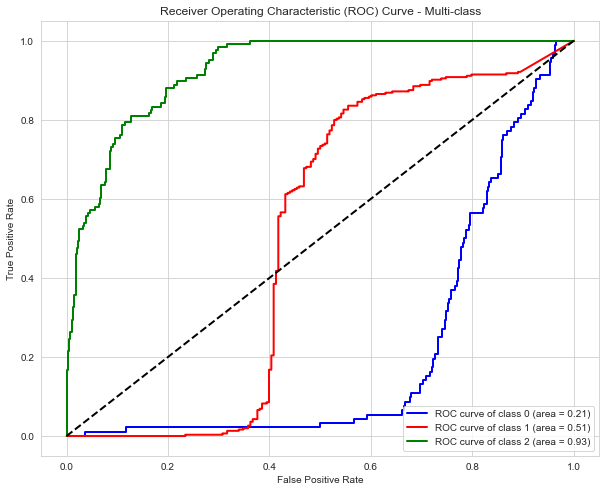

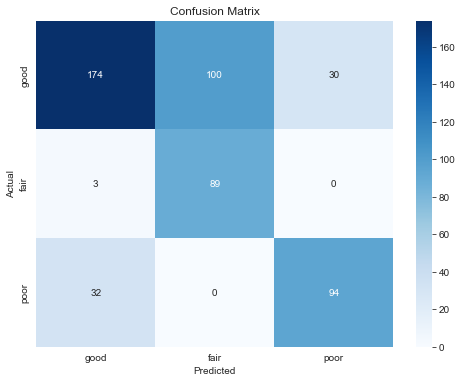

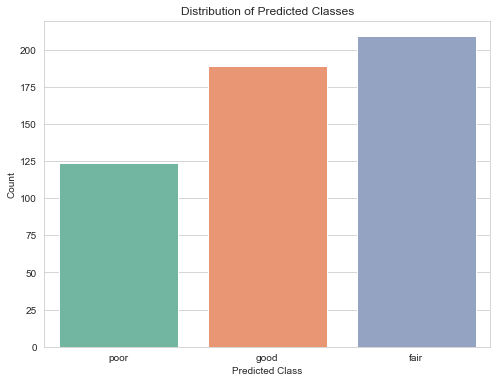

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y_bin = label_binarize(y_test, classes=['good', 'fair', 'poor'])
n_classes = y_bin.shape[1]

# Learn to predict each class against the rest
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc="lower right")
plt.show()




from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['good', 'fair', 'poor'], yticklabels=['good', 'fair', 'poor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y_bin = label_binarize(y_test, classes=['good', 'fair', 'poor'])
n_classes = y_bin.shape[1]

# Learn to predict each class against the rest
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Assuming clf has a `feature_importances_` attribute (not applicable to all classifiers)
if hasattr(clf, 'feature_importances_'):
    feature_importance = clf.feature_importances_
    feature_names = X_train.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance')
    plt.show()



plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette="Set2")
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

# Random Forest

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
              'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures',
              'school_support', 'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu',
              'internet', 'romantic', 'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
              'weekend_alcohol_usage', 'health', 'absences', 'period1_score', 'period2_score', 'final_score']

# Convert final_score to categorical variable
# Good: 15~20, Fair: 10~14, Poor: 0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good'
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair'
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor'

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8375796178343949

Classification Report:
               precision    recall  f1-score   support

        fair       0.79      0.96      0.87       171
        good       1.00      0.75      0.86        64
        poor       0.89      0.63      0.74        79

    accuracy                           0.84       314
   macro avg       0.89      0.78      0.82       314
weighted avg       0.86      0.84      0.83       314



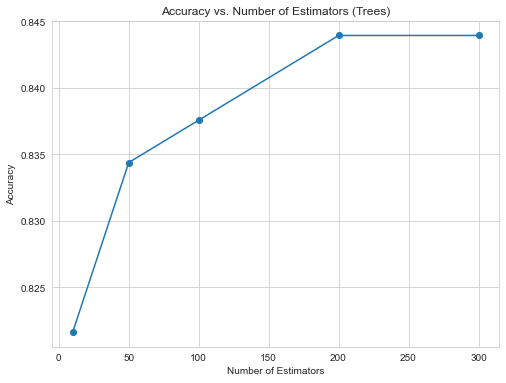

In [9]:
# Initialize lists to store accuracy values
n_estimators_values = [10, 50, 100, 200, 300]  # Different numbers of estimators to try
accuracies = []

for n_estimators in n_estimators_values:
    # Initialize and train the Random Forest Classifier with the current number of estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = rfc.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Estimators (Trees)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


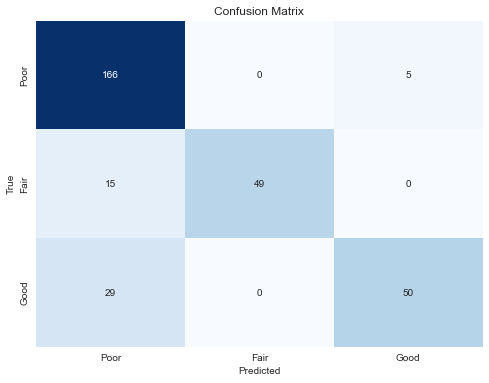

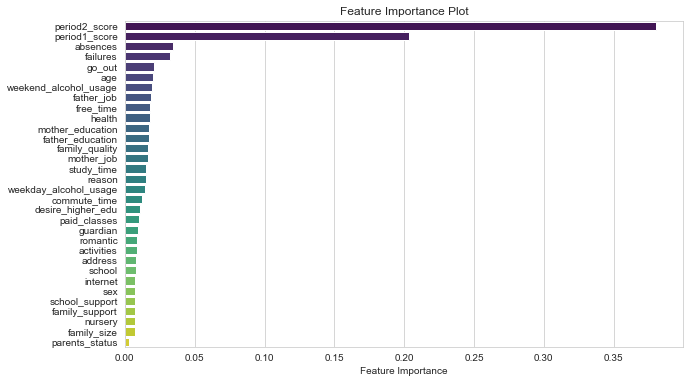

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Poor', 'Fair', 'Good'], yticklabels=['Poor', 'Fair', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importance = rfc.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


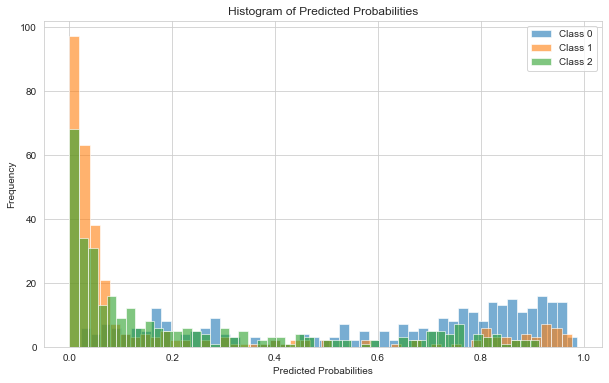

In [12]:
y_prob = rfc.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.hist(y_prob[:, i], bins=50, label='Class {0}'.format(i), alpha=0.6)

plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()


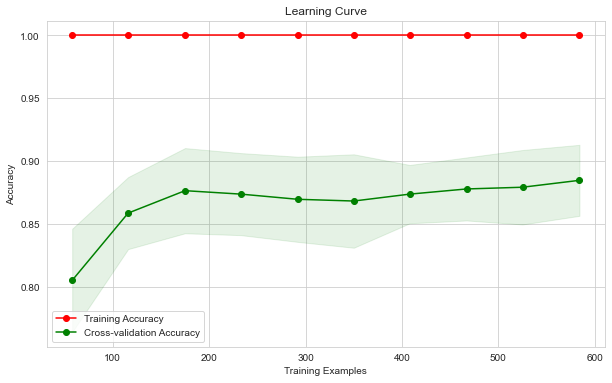

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")

plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


# ANN

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set_style('whitegrid')

# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
              'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures', 'school_support',
              'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic', 'family_quality',
              'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'period1_score', 'period2_score', 'final_score']

# Convert final_score to categorical variable: Good:15~20, Fair:10~14, Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8343949044585988

Classification Report:
               precision    recall  f1-score   support

        fair       0.81      0.90      0.86       171
        good       0.94      0.80      0.86        64
        poor       0.80      0.72      0.76        79

    accuracy                           0.83       314
   macro avg       0.85      0.81      0.83       314
weighted avg       0.84      0.83      0.83       314



E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\OneDrive\anaconda navigator\lib\site-packages\

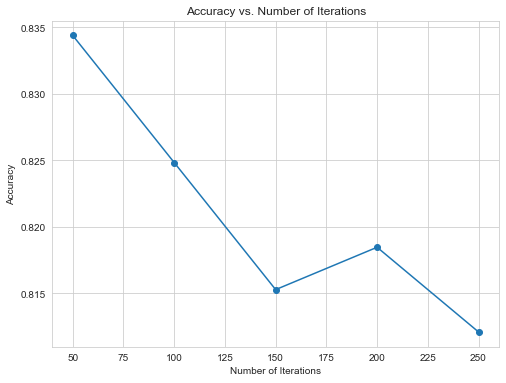

In [15]:
# Initialize lists to store accuracy values
max_iter_values = [50, 100, 150, 200, 250]  # Different numbers of iterations to try
accuracies = []

for max_iter in max_iter_values:
    # Define the MLP classifier with the current number of iterations
    clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=max_iter, random_state=42)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


E:\OneDrive\anaconda navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


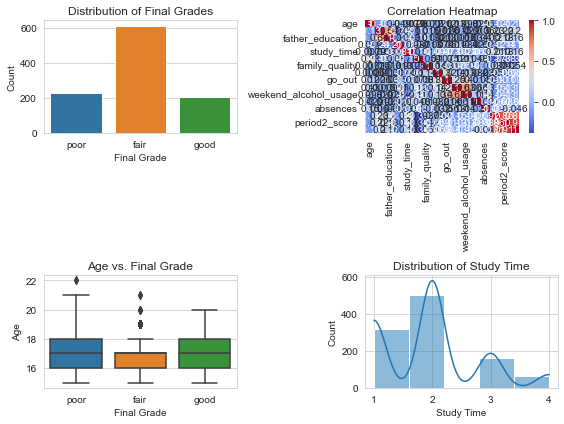

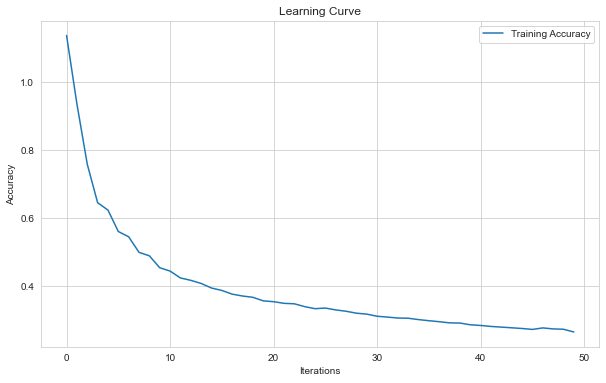

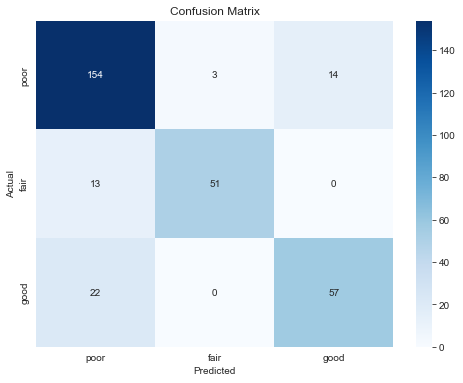

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

# Load the data from both CSV files
cse = pd.read_csv("student-cse.csv", sep=';')
ece = pd.read_csv("student-ece.csv", sep=';')

# Concatenate the data from both files
df = pd.concat([cse, ece])

# Columns to be used as features
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
              'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures', 'school_support',
              'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic', 'family_quality',
              'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'period1_score', 'period2_score', 'final_score']

# Convert final_score to a categorical variable: Good:15~20, Fair:10~14, Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good'
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair'
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor'

# Create feature matrix X and target vector y
X = df.drop(['final_score', 'final_grade'], axis=1)  # Drop 'final_score' since it's not needed as a feature
y = df['final_grade']

# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualizations
plt.figure(figsize=(8, 6))

# 1. Bar Plot for Final Grade Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='final_grade', data=df, order=['poor', 'fair', 'good'])
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Count')

# 2. Correlation Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 3. Box Plot for Age vs. Final Grade
plt.subplot(2, 2, 3)
sns.boxplot(x='final_grade', y='age', data=df, order=['poor', 'fair', 'good'])
plt.title('Age vs. Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Age')

# 4. Distribution of Study Time
plt.subplot(2, 2, 4)
sns.histplot(df['study_time'], bins=5, kde=True)
plt.title('Distribution of Study Time')
plt.xlabel('Study Time')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Learning Curve
train_accuracy = clf.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['poor', 'fair', 'good'], yticklabels=['poor', 'fair', 'good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
